In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Data Source
- https://www.tensorflow.org/datasets/catalog/cifar10
- https://www.cs.toronto.edu/~kriz/cifar.html

Learning Multiple Layers of Features from Tiny Images, Alex Krizhevsky, 2009

# Dataloading

In [11]:
cifar = tf.keras.datasets.cifar10
train, test = cifar.load_data()
train_images, train_labels = train
test_images, test_labels = test

## Train / Test Size

In [14]:
print(f'train_size:{train_labels.size} test_size:{test_labels.size}')

train_size:50000 test_size:10000


83.3% of the total amount of samples are used in the training set the remaining in the test set.

## Images

In [7]:
print(f'train_images shape:{train_images.shape} dtype:{train_images.dtype}')

train_images shape:(50000, 32, 32, 3) dtype:uint8


As seen from the output data data is a numpy array with 50000 entries and 3 dimensions.
We have the 2d image plane at which each point has 3 values for RGB specified with an uint8 (0-255).
An optimization could be to convert said datatype to float32.

## Labels

In [8]:
print(f'train_labels shape:{train_labels.shape} dtype:{train_labels.dtype}')

train_labels shape:(50000, 1) dtype:uint8


In [12]:
print(f'train_labels min:{np.min(train_labels)} max:{np.max(train_labels)}')

train_labels min:0 max:9


In [56]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo)
    return dict
classes = unpickle("batches.meta")
classes

{'num_cases_per_batch': 10000,
 'label_names': ['airplane',
  'automobile',
  'bird',
  'cat',
  'deer',
  'dog',
  'frog',
  'horse',
  'ship',
  'truck'],
 'num_vis': 3072}

In [59]:
classes[0]

KeyError: 0

As seen from the output the labels are integers ranging from 0 to 9 representing the available 10 classes.
Using tensor flow no further action is required as we can use SparseCategoricalCrossentropy which expects an integer as label.

## Lable Balance

In [6]:
unique_labels, counts = np.unique(train_labels, return_counts=True)
label_count_pairs = [
        f"{label}: {count}" for label, count in zip(unique_labels, counts)
    ]
print("Label distribution:", ", ".join(label_count_pairs))

Label distribution: 0: 5000, 1: 5000, 2: 5000, 3: 5000, 4: 5000, 5: 5000, 6: 5000, 7: 5000, 8: 5000, 9: 5000


## Example Images

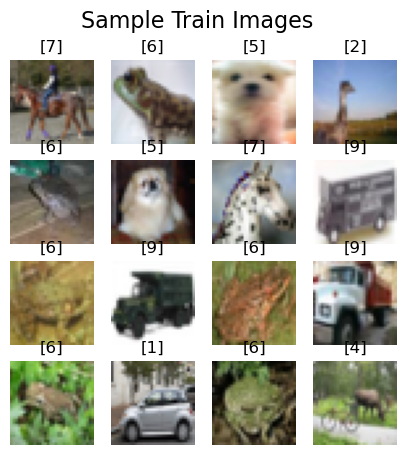

In [58]:
plt.figure(figsize=(5, 5))
for i in range(1, 17):
    sub = plt.subplot(4, 4, i)
    sub.axis("off")
    imgI = np.random.randint(0, train_images.shape[0])
    sub.set_title(train_labels[imgI])
    sub.imshow(train_images[imgI])

plt.suptitle("Sample Train Images", fontsize=16)
plt.show()

{'num_cases_per_batch': 10000,
 'label_names': ['airplane',
  'automobile',
  'bird',
  'cat',
  'deer',
  'dog',
  'frog',
  'horse',
  'ship',
  'truck'],
 'num_vis': 3072}